## Imports

In [1]:
# standard
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

print("Packages Imported!")

C:\Users\micha\AppData\Roaming\Python\Python37\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Packages Imported!


In [2]:
# local
import sys
sys.path.append("../../allen_vc")
from paths import PATH_EXTERNAL

## Settings

## Functions

## Load dataset

In [9]:
# Create Allensdk cache object
cache = EcephysProjectCache.from_warehouse(manifest=f"{PATH_EXTERNAL}/dataset/manifest.json")

In [10]:
# Isolate functional connectivity sections
sessions = cache.get_session_table()
functional_connectivity_sessions = sessions[sessions['session_type'] == 'functional_connectivity']

# Observe Cre distribution
functional_connectivity_sessions['full_genotype'].value_counts()

wt/wt                                              14
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       6
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       3
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     3
Name: full_genotype, dtype: int64

In [11]:
functional_connectivity_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
766640955,2019-10-03T00:00:00Z,744912849,functional_connectivity,133.0,M,wt/wt,842,2233,6,"[MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP..."
767871931,2019-10-03T00:00:00Z,753795610,functional_connectivity,135.0,M,wt/wt,713,2231,6,"[MRN, APN, MB, DG, CA1, VISrl, nan, VISam, PO,..."
768515987,2019-10-03T00:00:00Z,754477358,functional_connectivity,136.0,M,wt/wt,802,2217,6,"[MB, APN, NOT, DG, CA1, VISam, nan, Eth, LP, P..."
771160300,2019-10-03T00:00:00Z,754488979,functional_connectivity,142.0,M,wt/wt,930,2230,6,"[SCig, PPT, NOT, SUB, ProS, CA1, VISam, nan, A..."
771990200,2019-10-03T00:00:00Z,756578435,functional_connectivity,108.0,M,wt/wt,546,2229,6,"[APN, MB, DG, CA1, VISam, nan, PO, LP, VISpm, ..."


### Check out waveform metrics

In [12]:
# load example session
session = cache.get_session_data(786091066)

In [20]:
# what waveform features are pre-computed for this dataset?
units = session.units
all_features = units.columns.to_list()
features = [f for f in all_features if "waveform" in f]

# show
print("all feautes:")
print(units.columns)
print("\n\n Waveform features")
print(features)

all feautes:
Index(['waveform_repolarization_slope', 'presence_ratio', 'L_ratio',
       'waveform_velocity_above', 'amplitude_cutoff', 'waveform_duration',
       'firing_rate', 'nn_miss_rate', 'cluster_id', 'local_index_unit',
       'silhouette_score', 'waveform_PT_ratio', 'snr', 'isolation_distance',
       'waveform_velocity_below', 'waveform_halfwidth', 'waveform_spread',
       'nn_hit_rate', 'cumulative_drift', 'peak_channel_id', 'isi_violations',
       'waveform_recovery_slope', 'waveform_amplitude', 'd_prime', 'max_drift',
       'c50_dg', 'area_rf', 'fano_dg', 'fano_dm', 'fano_fl', 'fano_rf',
       'f1_f0_dg', 'g_dsi_dg', 'g_osi_dg', 'azimuth_rf', 'mod_idx_dg',
       'p_value_rf', 'pref_tf_dg', 'run_mod_dg', 'run_mod_dm', 'run_mod_fl',
       'run_mod_rf', 'pref_dir_dm', 'pref_ori_dg', 'run_pval_dg',
       'run_pval_dm', 'run_pval_fl', 'run_pval_rf', 'elevation_rf',
       'pref_speed_dm', 'firing_rate_dg', 'firing_rate_dm', 'firing_rate_fl',
       'firing_rate_rf', 'on

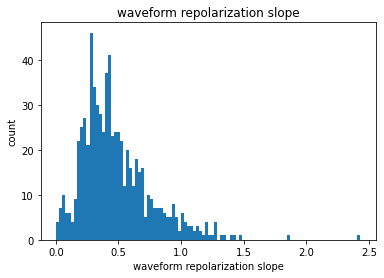

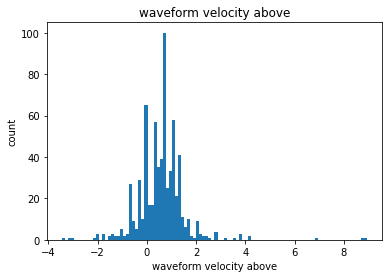

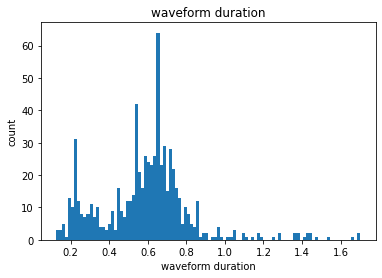

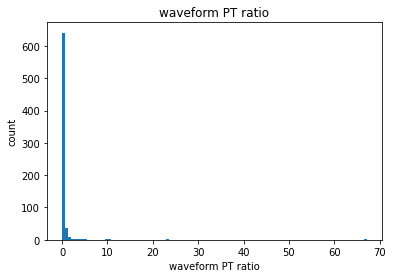

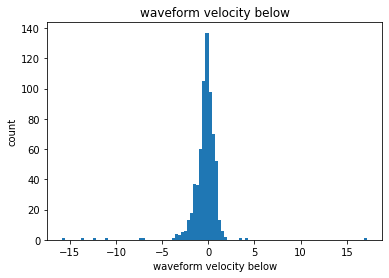

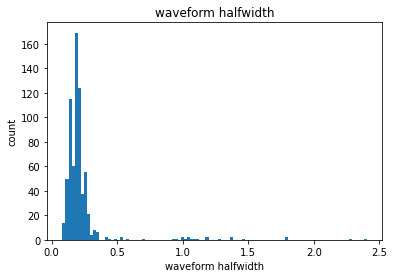

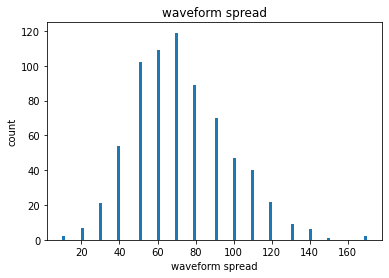

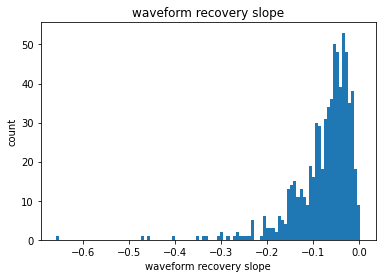

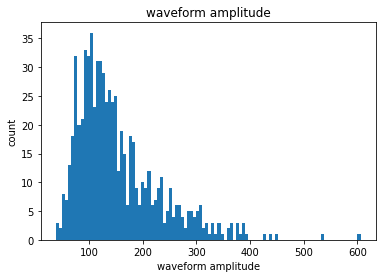

In [21]:
# plot histogram of waveform features
for feature in features:
    fig, ax = plt.subplots(1,1, figsize=[6,4])
    ax.hist(units[feature], bins=100)
    ax.set(xlabel=feature.replace("_", " "), ylabel="count")
    ax.set_title(feature.replace("_", " "))
    plt.show()

In [16]:
threshold = 0.8
slow_spike = (units['waveform_halfwidth'] > threshold).sum()
fast_spike = (units['waveform_halfwidth'] < threshold).sum()

print(f'At threshold {threshold} there are {fast_spike} fast spiking units and {slow_spike} slow spiking units.')

At threshold 0.8 there are 671 fast spiking units and 20 slow spiking units.


In [21]:
threshold = 0.4
slow_spike = (units['waveform_duration'] > threshold).sum()
fast_spike = (units['waveform_duration'] < threshold).sum()

print(f'At threshold {threshold} there are {fast_spike} fast spiking units and {slow_spike} slow spiking units.')

At threshold 0.4 there are 145 fast spiking units and 555 slow spiking units.


### Get waveform features for all units in dataset
Create dataframe with waveform feature and mean spike rate.  
NOTE: This take a while to run. The results can be loaded below

In [22]:
# define metrics to save out

waveform_metrics = ['waveform_repolarization_slope',
       'waveform_velocity_above', 'waveform_duration',
       'waveform_velocity_below', 'waveform_halfwidth', 'waveform_spread',
       'waveform_recovery_slope', 'waveform_amplitude']

In [23]:
# create combined unit dataframe
wave_dfs = []

for i, session_id in enumerate(functional_connectivity_sessions.index):
    print(session_id)
    
    session = cache.get_session_data(session_id)
    units = session.units[waveform_metrics + ['peak_channel_id']]
    spikes = session.spike_times
    wvs = session.mean_waveforms
    
    mean_ISIs = []
    mean_wv_times = []
    mean_wv_values = []
    for unit_id in units.index:
        
        # save out ISIs
        mean_ISIs.append(np.mean(np.diff(spikes[unit_id])))
        
        # save out mean waveforms here
        peak_channel = units.loc[unit_id].peak_channel_id
        wv = wvs[unit_id].sel(channel_id = peak_channel)
        mean_wv_times.append(np.array(wv.time))
        mean_wv_values.append(np.array(wv))
                         
    units['mean_isi'] = mean_ISIs
    units['mean_wv_times'] = mean_wv_times
    units['mean_wv_values'] = mean_wv_values
    units['session_id'] = session_id
    wave_dfs.append(units.drop(columns=['peak_channel_id']).reset_index())

        
all_unit_waveforms_df = pd.concat(wave_dfs)

766640955
767871931
768515987
771160300
771990200


c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1348: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "


774875821
778240327
778998620
779839471
781842082
786091066
787025148
789848216
793224716
794812542
816200189
819186360
819701982
821695405
829720705
831882777
835479236
839068429
839557629


c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1261: RuntimeWarning: divide by zero encountered in true_divide
  self.probes.loc[probe_id]['sampling_rate']
c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1261: RuntimeWarning: invalid value encountered in true_divide
  self.probes.loc[probe_id]['sampling_rate']
c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1261: RuntimeWarning: divide by zero encountered in true_divide
  self.probes.loc[probe_id]['sampling_rate']
c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1261: RuntimeWarning: invalid value encountered in true_divide
  self.probes.loc[probe_id]['sampling_rate']
c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1261: Runti

840012044


c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1348: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "


847657808


c:\Users\micha\anaconda3\envs\allen_vc\lib\site-packages\allensdk\brain_observatory\ecephys\ecephys_session.py:1348: UserWarning: Session includes invalid time intervals that could be accessed with the attribute 'invalid_times',Spikes within these intervals are invalid and may need to be excluded from the analysis.
  warnings.warn("Session includes invalid time intervals that could "


In [24]:
all_unit_waveforms_df.head()

,unit_id,waveform_repolarization_slope,waveform_velocity_above,waveform_duration,waveform_velocity_below,waveform_halfwidth,waveform_spread,waveform_recovery_slope,waveform_amplitude,mean_isi,mean_wv_times,mean_wv_values,session_id
0,950911624,0.666637,0.412060,0.247236,0.000000,0.137353,60.0,-0.115895,156.94965,0.112076,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -1.1590800000000006, -1.6512600000000006...",766640955
1,950911641,0.494906,-0.343384,0.219765,0.068677,0.109883,60.0,-0.085105,144.38775,0.104910,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.8845199999999993, -1.2725699999999995...",766640955
2,950911686,0.554810,0.686767,0.247236,0.000000,0.109883,30.0,-0.080528,132.55983,0.052577,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.6778199999999998, -1.0471500000000007...",766640955
3,950911657,0.454659,0.343384,0.412060,0.068677,0.137353,70.0,-0.060789,108.66375,0.137380,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.4032600000000013, -1.12515, -1.692990...",766640955
4,950911696,0.779000,0.000000,0.178559,-0.608279,0.123618,100.0,-0.220320,186.91374,0.122068,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.9044099999999942, -1.4465100000000035...",766640955


In [25]:
print(f"N units:\t{len(all_unit_waveforms_df['unit_id'].unique())}")
print(f"N sessions:\t{len(all_unit_waveforms_df['session_id'].unique())}")
all_unit_waveforms_df

N units:	18168
N sessions:	26


,unit_id,waveform_repolarization_slope,waveform_velocity_above,waveform_duration,waveform_velocity_below,waveform_halfwidth,waveform_spread,waveform_recovery_slope,waveform_amplitude,mean_isi,mean_wv_times,mean_wv_values,session_id
0,950911624,0.666637,0.412060,0.247236,0.000000,0.137353,60.0,-0.115895,156.949650,0.112076,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -1.1590800000000006, -1.6512600000000006...",766640955
1,950911641,0.494906,-0.343384,0.219765,0.068677,0.109883,60.0,-0.085105,144.387750,0.104910,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.8845199999999993, -1.2725699999999995...",766640955
2,950911686,0.554810,0.686767,0.247236,0.000000,0.109883,30.0,-0.080528,132.559830,0.052577,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.6778199999999998, -1.0471500000000007...",766640955
3,950911657,0.454659,0.343384,0.412060,0.068677,0.137353,70.0,-0.060789,108.663750,0.137380,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.4032600000000013, -1.12515, -1.692990...",766640955
4,950911696,0.779000,0.000000,0.178559,-0.608279,0.123618,100.0,-0.220320,186.913740,0.122068,"[0.0, 3.3333368334807866e-05, 6.66667366696157...","[0.0, -0.9044099999999942, -1.4465100000000035...",766640955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869,951190560,0.488657,0.000000,0.206030,0.147164,0.137353,100.0,-0.107414,112.009560,0.064330,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, 0.20592000000000255, 0.4095, 0.070200000...",847657808
870,951190571,0.225447,0.824121,0.782915,-0.304140,0.219765,100.0,-0.029030,109.269615,3.794459,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, -0.1405950000000029, -0.1969500000000018...",847657808
871,951190848,0.378583,0.892797,0.673032,-0.206030,0.206030,80.0,-0.052196,124.145190,1.061227,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, -0.21995999999999505, -0.271439999999997...",847657808
872,951190594,0.343781,1.030151,0.700503,-0.137353,0.219765,80.0,-0.061936,140.108085,0.748724,"[0.0, 3.3333039933639194e-05, 6.66660798672783...","[0.0, -0.3860999999999981, -0.1263600000000018...",847657808


### load/save results

In [26]:
# load/save results
all_unit_waveforms_df.to_csv(f'{PATH_EXTERNAL}/data/waveforms/all_units.csv')
# all_unit_waveforms_df = pd.read_csv(f'{PATH_EXTERNAL}/data/waveforms/all_units.csv')

### plot results

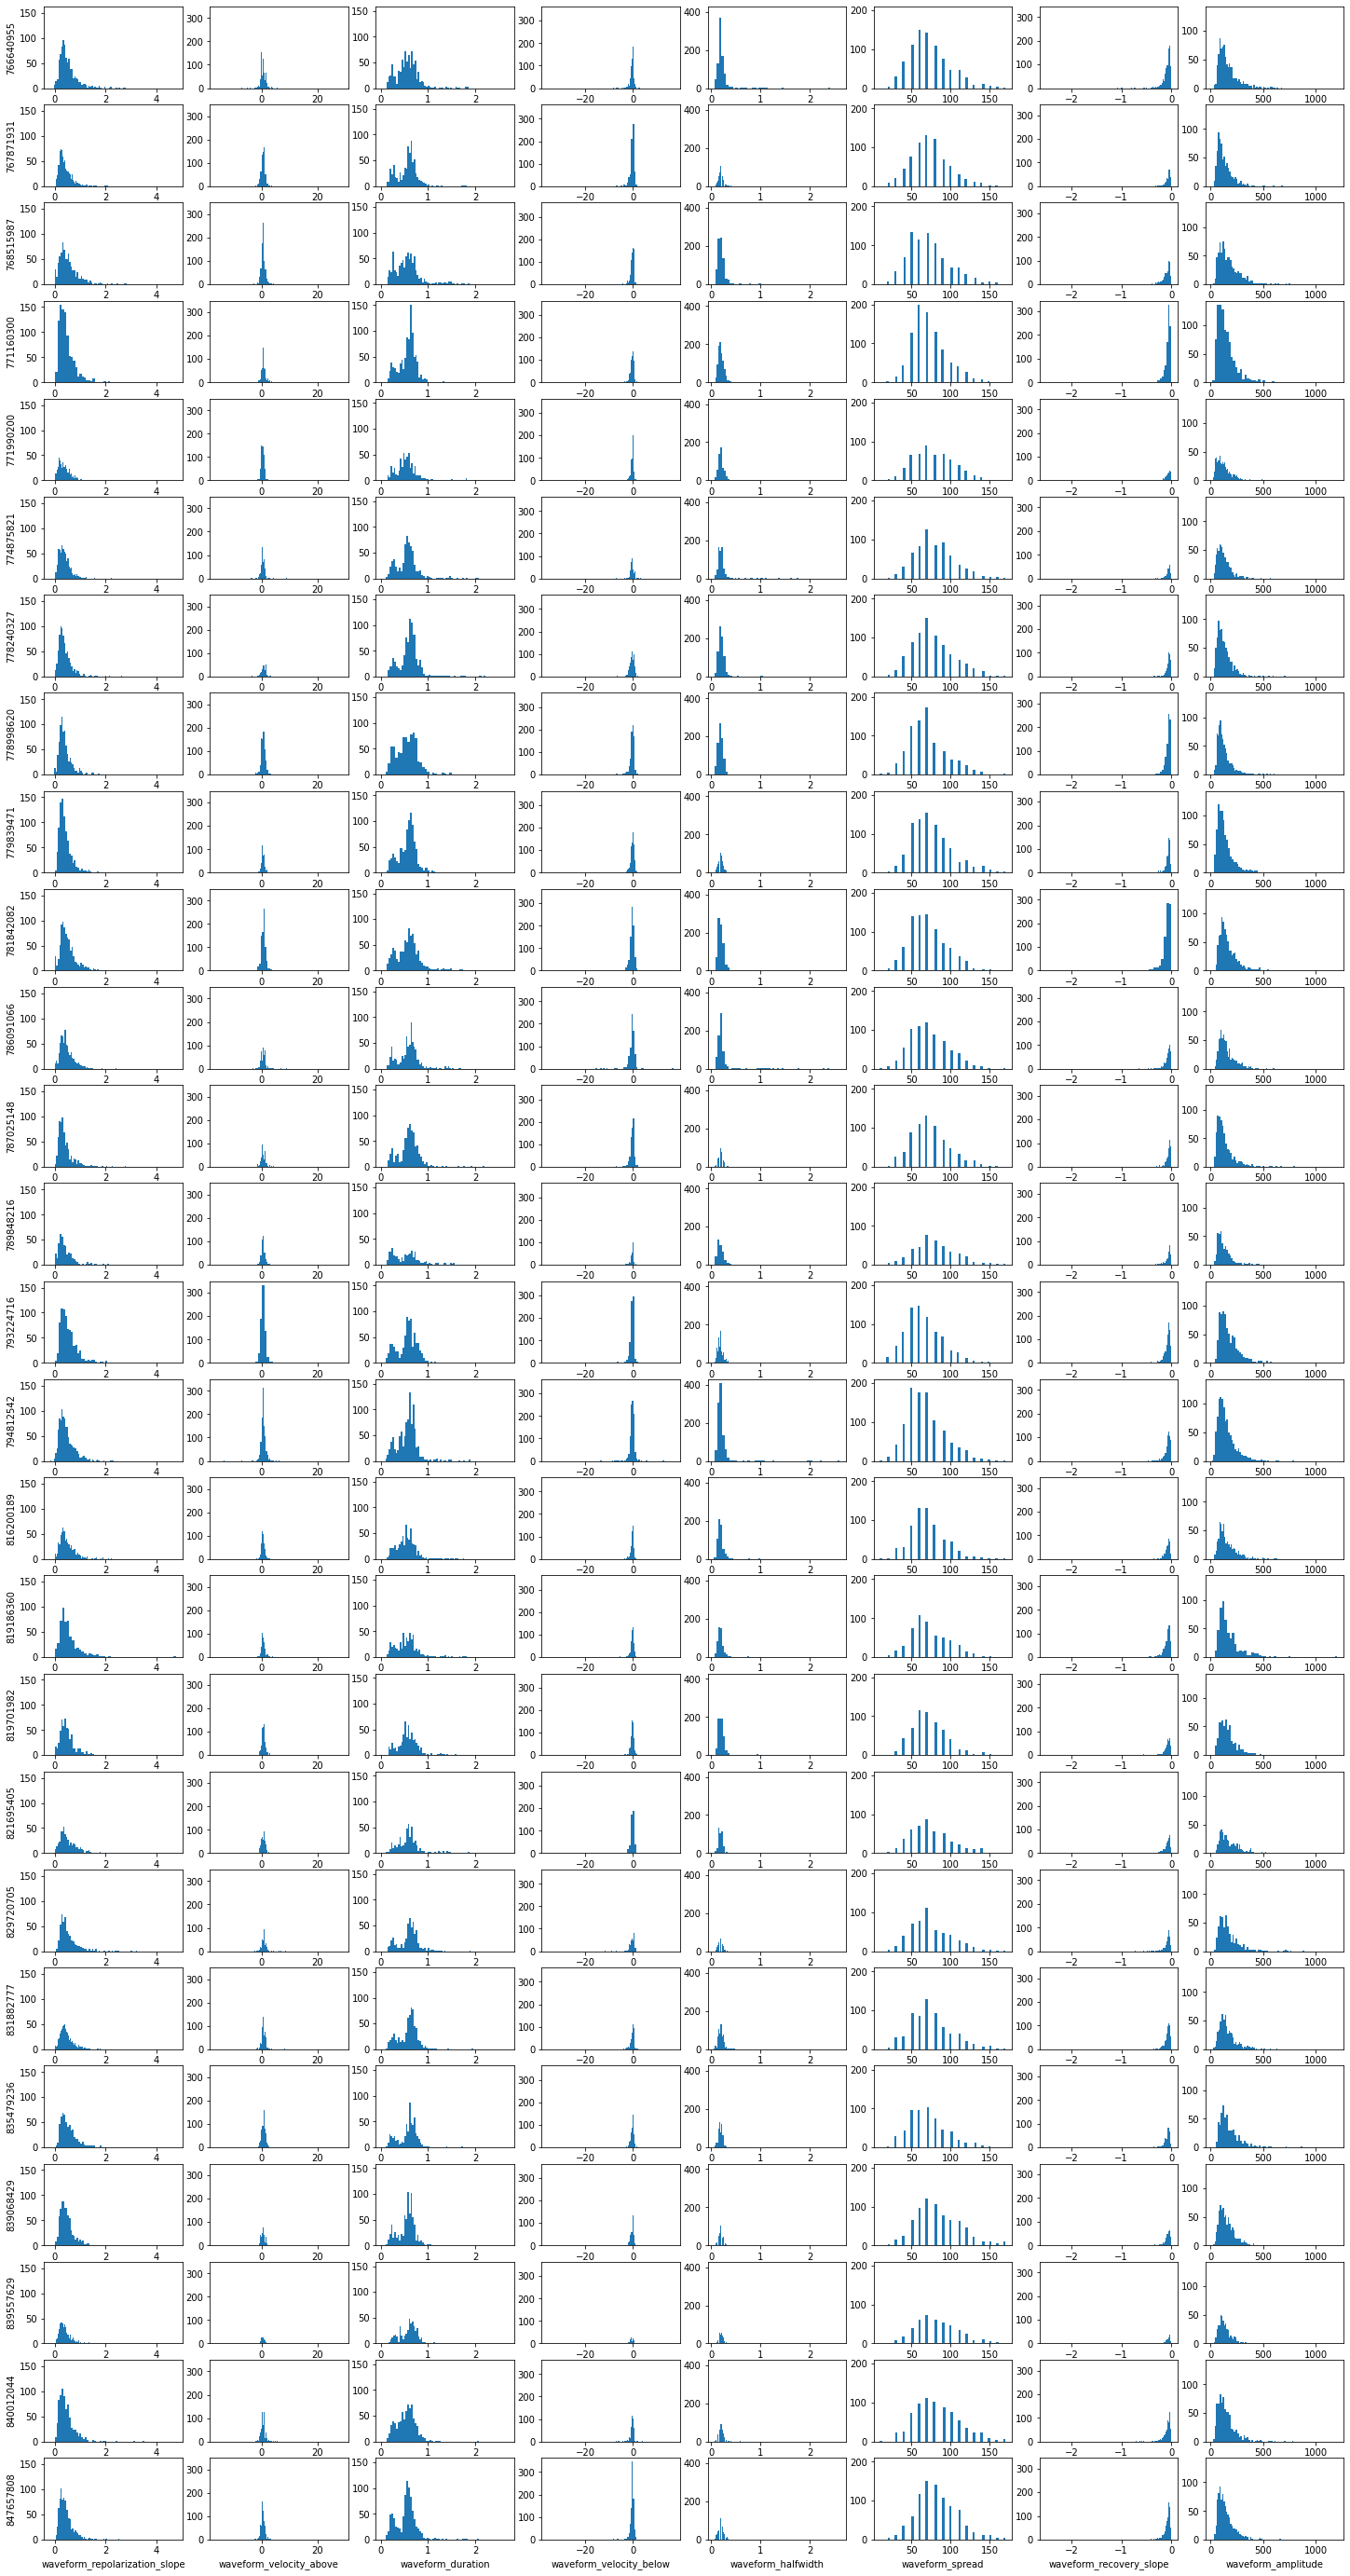

In [41]:
# loop through each session and plot these histograms

fig, axs = plt.subplots(len(functional_connectivity_sessions.index), len(waveform_metrics), figsize=(25, 50))

for i, session_id in enumerate(functional_connectivity_sessions.index):
    # print(session_id)
    ses_wv = all_unit_waveforms_df[all_unit_waveforms_df['session_id'] == session_id]
    
    for j, wvm in enumerate(waveform_metrics):
        
        axs[i, j].hist(ses_wv[wvm], bins=50)
                        
        if j == 0:
            axs[i, j].set_ylabel(session_id)
                        
        if i==len(functional_connectivity_sessions.index)-1:
                axs[i, j].set_xlabel(wvm)
                
        # share axes
        axs[i,j].sharex(axs[0,j])
        axs[i,j].sharey(axs[0,j])
                

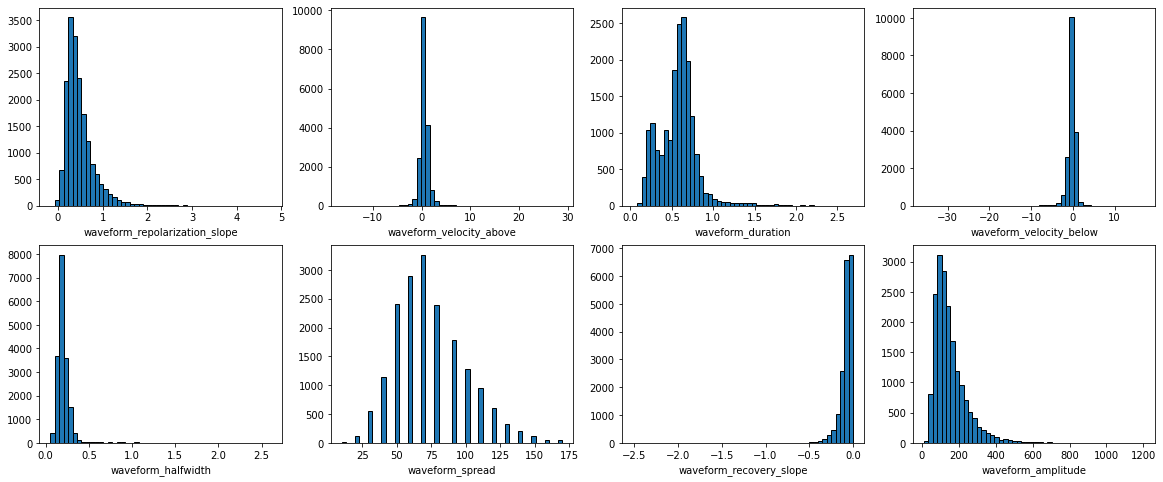

In [30]:
# combine data across sessions

fig, axs = plt.subplots(2, 4, figsize=(20, 8))

for ax, wvm in zip(np.ravel(axs), waveform_metrics):
        
        ax.hist(all_unit_waveforms_df[wvm], bins=50, edgecolor='black')
        ax.set_xlabel(wvm)

In [40]:
# kde plot

# fig, axs = plt.subplots(1, 8, figsize=(40, 5))

# for j, wvm in enumerate(waveform_metrics):
        
#         sns.kdeplot(all_unit_waveforms_df[wvm], ax=axs[j])
#         axs[j].set_xlabel(wvm)


In [ ]:
# some metric definitions from Allen white pages

"""
Waveform amplitude: The difference (in microvolts) between the peak and trough of the waveform on a single channel.
Waveform spread: Spatial extent (in microns) of channels where the waveform amplitude exceeds 12% of the peak
amplitude.
Waveform duration: Difference (in ms) of the time of the waveform peak and trough on the channel with maximum
amplitude.
"""